In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML



## Preparing The Data

In [38]:
# Training Data
hem = pd.DataFrame({
    "comedy":[100,0,15,85],
    "action":[0,100,90,20],
    "class":["comedy", "action", "action", "comedy"]
},)

hem

,comedy,action,class
0,100,0,comedy
1,0,100,action
2,15,90,action
3,85,20,comedy


In [39]:
#Validation Data
ant = pd.DataFrame({
    "comedy":[10,85],
    "action":[95,15],
    "class":["action","comedy"]
})
ant

,comedy,action,class
0,10,95,action
1,85,15,comedy


In [40]:
kum = pd.DataFrame({
    "comedy":[6, 93, 50],
    "action":[70, 23, 50]
})
kum

,comedy,action
0,6,70
1,93,23
2,50,50


## Visualizing

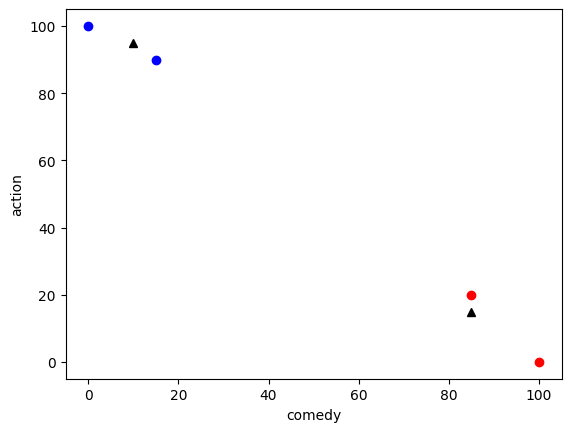

In [41]:
plt.plot(hem[hem['class']=='comedy']['comedy'], hem[hem['class']=='comedy']['action'],'o', color='r' )
plt.plot(hem[hem['class']=='action']['comedy'], hem[hem['class']=='action']['action'],'o', color='b', )
plt.plot(ant['comedy'], ant['action'],'k^')
plt.xlabel("comedy")
plt.ylabel("action")
plt.show()

## Calculating The Distance for n dimensions (Here 2)

In [42]:
import math


# call as euclid_dist((1,2,3), (3,4,5)); or euclid_dist((1,2), (3,4));
def euclid_dist(h, k):
    hemant = 0

    #assuming len(p1) == len(p2)
    assert len(h) == len(k) 

    for e in range(len(h)):
        hemant += (h[e] - k[e])**2;
    hemant_kumar = math.sqrt(hemant);
    return hemant_kumar

In [43]:
hem.columns

Index(['comedy', 'action', 'class'], dtype='object')

## Finding k by comparing each point in validation set with neighbours

making it general so that it can be used for any number of dimensions and any number of features

In [44]:
def get_best_k(hema, ntku,k_values = None, verbose=True):
    if(k_values is None):
         k_values = range(1, len(hema)+1, 2)
    k_len = len(k_values)
    k_accuracies = pd.DataFrame({"k":[i for i in k_values],"pointsEvaluated":np.zeros(k_len), "correctPred": np.zeros(k_len),"accuracy":np.zeros(k_len)})

    features = [col for col in hema.columns if col != 'class']
    for i in ntku.index:
        actual_class =  ntku.loc[i, 'class'];
        if(verbose):
            print("For eval point:", i)
            print("Actual Class:" ,actual_class)

        dist_table = []
        for j in hema.index:
                p1= [ntku.loc[i, f] for f in features]
                p2 = [hema.loc[j,f] for f in features]

                dist = euclid_dist(p1, p2)

                dist_table.append({"dist":dist, "class":hema.loc[j, 'class'], "val":i, "train":j});
        dist_table = pd.DataFrame(dist_table)
        dist_table = dist_table.sort_values(by='dist')
        
        if(verbose):
            display(HTML(dist_table.to_html()))
            print("-----------------------------------")
        
        # Iterating all odd values
        for k in k_values:
            predicted_class = dist_table.iloc[:k]['class'].value_counts().idxmax()
            k_accuracies.loc[k_accuracies['k'] == k, 'pointsEvaluated'] += 1
            k_accuracies.loc[k_accuracies['k'] == k, 'correctPred'] += (1 if actual_class == predicted_class else 0)
            k_accuracies.loc[k_accuracies['k'] == k, 'accuracy'] = k_accuracies.loc[k_accuracies['k'] == k, 'correctPred']*100/k_accuracies.loc[k_accuracies['k'] == k, 'pointsEvaluated']
    
    sorted_k = k_accuracies.sort_values(by=['accuracy'], ascending=False)
    print("Comparing All k\n")
    print(sorted_k)
    return sorted_k.iloc[0]['k']


best_k = get_best_k(hem, ant, k_values=[1,3])
print("\nBest K:",best_k)

For eval point: 0
Actual Class: action


,dist,class,val,train
2,7.071068,action,0,2
1,11.180340,action,0,1
3,106.066017,comedy,0,3
0,130.862523,comedy,0,0


-----------------------------------
For eval point: 1
Actual Class: comedy


,dist,class,val,train
3,5.000000,comedy,1,3
0,21.213203,comedy,1,0
2,102.591423,action,1,2
1,120.208153,action,1,1


-----------------------------------
Comparing All k

   k  pointsEvaluated  correctPred  accuracy
0  1              2.0          2.0     100.0
1  3              2.0          2.0     100.0

Best K: 1.0


## Predicting on Test Data

In [45]:
def predict(k, train, test):
  test['predicted_class'] = np.nan
  k = int(k)
  features = [col for col in train.columns if col != 'class']
  for i in test.index:
    dist_table = []
    for j in train.index:
      p1 = [test.loc[i, f] for f in features]
      p2 = [train.loc[j, f] for f in features]
      dist = euclid_dist(p1, p2)
      dist_table.append({"dist": dist, "class": train.loc[j, 'class']})
    dist_table = pd.DataFrame(dist_table)
    dist_table = dist_table.sort_values(by='dist')

    pred_class = dist_table.iloc[:k]["class"].value_counts().idxmax()
    test.loc[i,'predicted_class'] = pred_class
  return test
predict(best_k, hem, kum);

display(HTML(kum.to_html()))


C:\Users\Hp\AppData\Local\Temp\ipykernel_13136\1403797286.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'action' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.loc[i,'predicted_class'] = pred_class


,comedy,action,predicted_class
0,6,70,action
1,93,23,comedy
2,50,50,comedy


# Iris Dataset

Since i have created all the functions in a generalized way, we can use the same functions again here

## Loading The Dataset

In [46]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [47]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [48]:
print("Target Names:", iris.target_names)
print("Feature Names:", iris.feature_names)

Target Names: ['setosa' 'versicolor' 'virginica']
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [49]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
data['class'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Train-Test-Validation Split 

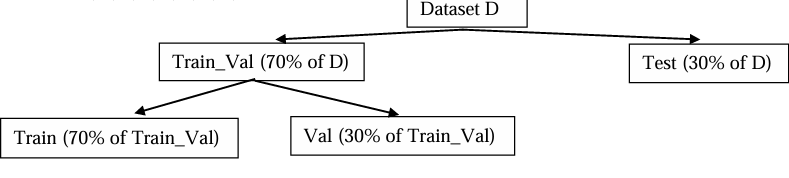

In [51]:
def split_data_equally(df, ratio, random_state):
  classwise_df = [x.sample(frac=1, random_state=random_state) for _, x in df.groupby('class')]  # Shuffle within each class
  train_df = pd.DataFrame()
  test_df = pd.DataFrame()
  for i in classwise_df:
      train_df = pd.concat([train_df, i.iloc[:int(ratio * len(i))]])
      test_df = pd.concat([test_df, i.iloc[int(ratio * len(i)):]])

  return train_df.sample(frac=1, random_state=random_state), test_df.sample(frac=1, random_state=random_state) 

train_eval, kum = split_data_equally(data, 0.7, random_state=42)
hem, ant = split_data_equally(train_eval, 0.7, random_state=42)
print("Train shape:", hem.shape)
print("Validation shape:", ant.shape)
print("Test shape:", kum.shape)

Train shape: (72, 5)
Validation shape: (33, 5)
Test shape: (45, 5)


In [52]:
test_y = kum['class']
test_x = kum.drop(columns=['class'])

In [53]:
best_k = get_best_k(hem, ant, k_values=range(1, 10), verbose=False)
print("Best K:", best_k)
test_x = predict(best_k, train_eval, test_x)
preds = test_x['predicted_class']
test_x.head()

Comparing All k

   k  pointsEvaluated  correctPred   accuracy
0  1             33.0         31.0  93.939394
1  2             33.0         31.0  93.939394
3  4             33.0         31.0  93.939394
5  6             33.0         31.0  93.939394
6  7             33.0         31.0  93.939394
7  8             33.0         31.0  93.939394
8  9             33.0         31.0  93.939394
2  3             33.0         30.0  90.909091
4  5             33.0         30.0  90.909091
Best K: 1.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predicted_class
54,6.5,2.8,4.6,1.5,1.0
125,7.2,3.2,6.0,1.8,2.0
98,5.1,2.5,3.0,1.1,1.0
127,6.1,3.0,4.9,1.8,2.0
23,5.1,3.3,1.7,0.5,0.0


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, preds)

1.0